project/

├── IMG/                            
├── robot_log_cleaned.xlsx        
└── HW3.py     

Objective: Train a CNN using the image as input, and SteerAngle + Throttle as the output.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 188.3 MB/s eta 0:00:001m337.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 133.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip uninstall -y tensorflow

Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install git+https://github.com/tensorflow/tensorflow.git#tensorflow-gpu

  Cloning https://github.com/tensorflow/tensorflow.git to /tmp/pip-req-build-loctmbt8
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/tensorflow.git /tmp/pip-req-build-loctmbt8
  Resolved https://github.com/tensorflow/tensorflow.git to commit 37c09a07f39c63bc23c05bfbd0582cd729d2d52e
ERROR: git+https://github.com/tensorflow/tensorflow.git#tensorflow-gpu does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


In [10]:
conda install cudatoolkit cudnn

Channels:
 - defaults
Platform: linux-64
doneecting package metadata (repodata.json): - 
doneing environment: | 

## Package Plan ##

  environment location: /home/exouser/.conda/envs/my5920_env

  added / updated specs:
    - cudatoolkit
    - cudnn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       h06a4308_0         129 KB
    cudatoolkit-11.8.0         |       h6a678d5_0       630.7 MB
    cudnn-8.9.2.26             |         cuda11_0       469.4 MB
    openssl-3.0.16             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:        1.08 GB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/linux-64::cudatoolkit-11.8.0-h6a678d5_0 
  cudnn              pkgs/main/linux-64::cudnn-8.9.2.26-cuda11_0 

The following packages wil

In [24]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


**Task 2**

In [7]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

Data Loading and Preprocessing

In [2]:
# Load the cleaned Excel
df = pd.read_excel("robot_log_cleaned.xlsx") #we have to add our excel path

# Extract paths and targets
image_paths = df["Path"].values
steer = df["SteerAngle"].astype(float).values
throttle = df["Throttle"].astype(float).values

# Normalize steering and throttle
steer = steer / 25.0  # if range is approx -25 to 25
throttle = throttle / 1.0  # if range is 0 to 1

# Load images and resize
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (320, 160))  # keeping original image size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img / 255.0  # Normalize to [0, 1]
    
# imgs = [path.split('/')[-2]+'/'+path.split('/')[-1] for path in image_paths]
# test = load_image('IMG/robocam_2025_04_03_19_07_07_216.jpg')
X = np.array([load_image(p) for p in image_paths])
y = np.stack((steer, throttle), axis=1)

In [32]:
ls

HW3.ipynb  IMG/  robot_log_cleaned.xlsx


Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CNN Model

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

In [8]:
model = Sequential([
    Input(shape=(160, 320, 3)),
    Conv2D(24, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(36, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(48, (5, 5), strides=(2, 2), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(2)  # output: [SteerAngle, Throttle]
])

model.compile(optimizer=Adam(1e-4), loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 78, 158, 24)    │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 77, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 17, 37, 48)     │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 35, 64)     │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 27456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │     2,745,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,882,630 (11.00 MB)

 Trainable params: 2,882,630 (11.00 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save("rover_control_model.h5")

Epoch 1/10


I0000 00:00:1744130930.507874   14968 service.cc:152] XLA service 0x7472840122c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744130930.507919   14968 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-04-08 16:48:50.553696: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744130932.192764   14968 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-04-08 16:48:52.194796: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164896132 exceeds 10% of free system memory.


1/3 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - loss: 0.2287

2025-04-08 16:48:52.911992: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164896132 exceeds 10% of free system memory.


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - loss: 0.2231

2025-04-08 16:48:55.253868: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 130863492 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.2151 - val_loss: 0.2128
Epoch 2/10


2025-04-08 16:48:56.396381: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164896132 exceeds 10% of free system memory.


1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - loss: 0.1667

2025-04-08 16:48:57.139966: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164896132 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 805ms/step - loss: 0.1591 - val_loss: 0.1245
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step - loss: 0.1567 - val_loss: 0.1064
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 730ms/step - loss: 0.1537 - val_loss: 0.1055
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 641ms/step - loss: 0.1990 - val_loss: 0.1316
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step - loss: 0.1580 - val_loss: 0.1588
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 737ms/step - loss: 0.1717 - val_loss: 0.1691
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 776ms/step - loss: 0.1408 - val_loss: 0.1513
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 737ms/step - loss: 0.1504 - val_loss: 0.1239
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - loss: 0.1430 - val_loss: 0.1084


**Task 3**

 Inference and Anecdotal Results


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


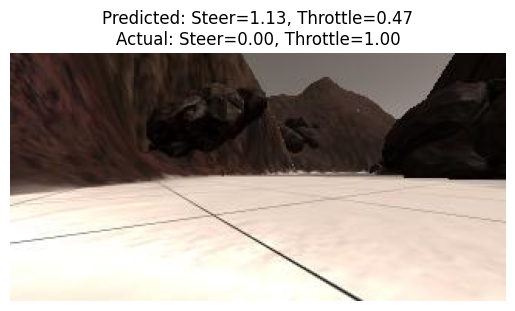

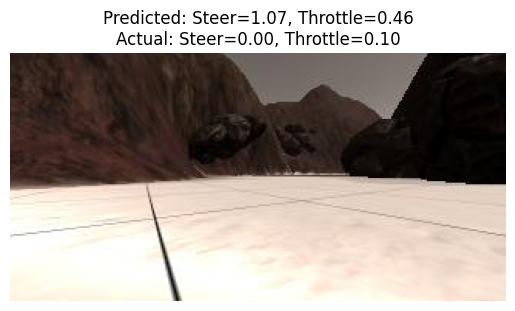

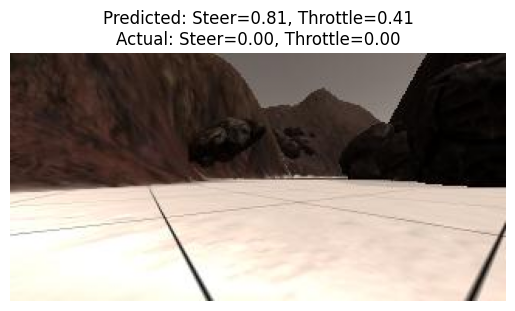

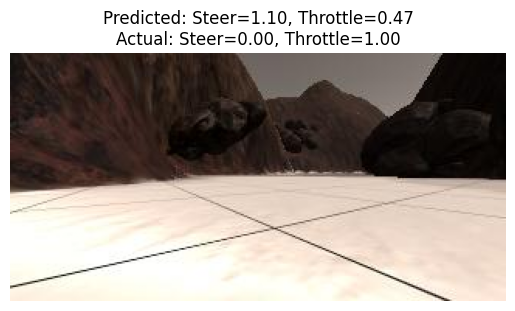

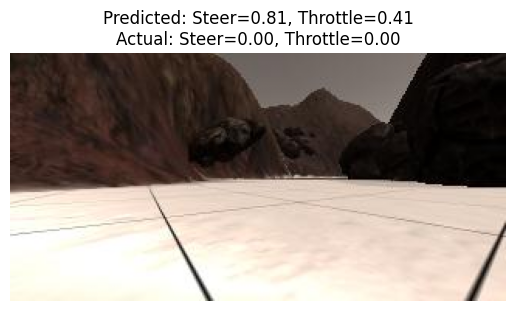

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# De-normalize (if needed)
predicted_steer = y_pred[:, 0] * 25.0
predicted_throttle = y_pred[:, 1]

actual_steer = y_test[:, 0] * 25.0
actual_throttle = y_test[:, 1]

# Plot a few sample predictions
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Predicted: Steer={predicted_steer[i]:.2f}, Throttle={predicted_throttle[i]:.2f}\n"
              f"Actual: Steer={actual_steer[i]:.2f}, Throttle={actual_throttle[i]:.2f}")
    plt.axis('off')
    plt.show()